Time to reach halfway temperature: 6.9 minutes
Time to reach 90% cooling: 23.0 minutes


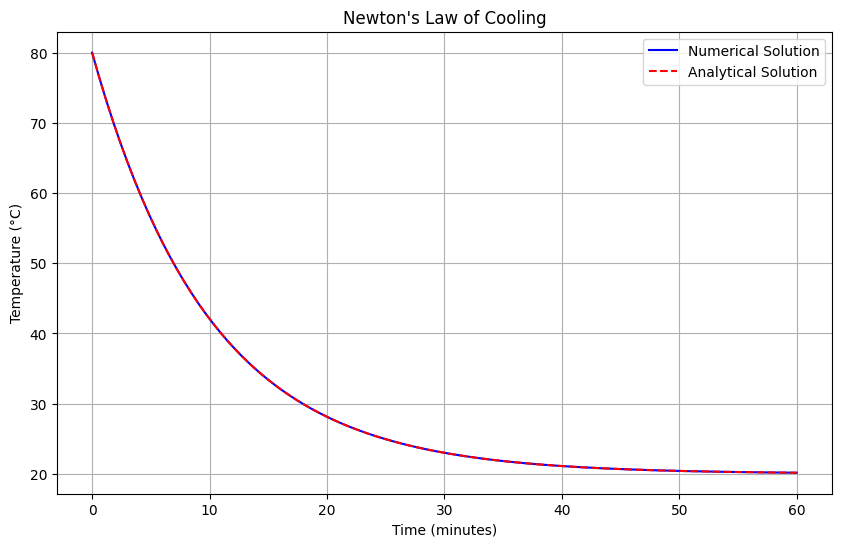

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def newton_cooling(T, t, k, T_amb):
    """
    Differential equation for Newton's Law of Cooling
    dT/dt = -k(T - T_amb)

    Parameters:
    T: Current temperature
    t: Time
    k: Cooling coefficient
    T_amb: Ambient temperature
    """
    return -k * (T - T_amb)

# Set parameters
k = 0.1  # cooling coefficient
T_amb = 20  # ambient temperature (°C)
T0 = 80  # initial temperature (°C)
t = np.linspace(0, 60, 200)  # time points (minutes)

# Solve the differential equation
solution = odeint(newton_cooling, T0, t, args=(k, T_amb))

# Analytical solution
T_analytical = T_amb + (T0 - T_amb) * np.exp(-k * t)

# Create visualization
plt.figure(figsize=(10, 6))
plt.plot(t, solution, 'b-', label='Numerical Solution')
plt.plot(t, T_analytical, 'r--', label='Analytical Solution')
plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title("Newton's Law of Cooling")
plt.legend()

# Calculate time to reach specific temperatures
def time_to_temp(target_temp):
    return -np.log((target_temp - T_amb)/(T0 - T_amb))/k

# Example calculations
half_cooling = time_to_temp((T0 + T_amb)/2)
ninety_percent = time_to_temp(T_amb + 0.1*(T0 - T_amb))

print(f"Time to reach halfway temperature: {half_cooling:.1f} minutes")
print(f"Time to reach 90% cooling: {ninety_percent:.1f} minutes")


Winter Room (T_amb = 15°C):
Time to cool halfway: 6.9 minutes
Time to cool 90%: 23.0 minutes

Standard Room (T_amb = 22°C):
Time to cool halfway: 6.9 minutes
Time to cool 90%: 23.0 minutes

Hot Summer Day (T_amb = 35°C):
Time to cool halfway: 6.9 minutes
Time to cool 90%: 23.0 minutes

Industrial Freezer (T_amb = -18°C):
Time to cool halfway: 6.9 minutes
Time to cool 90%: 23.0 minutes


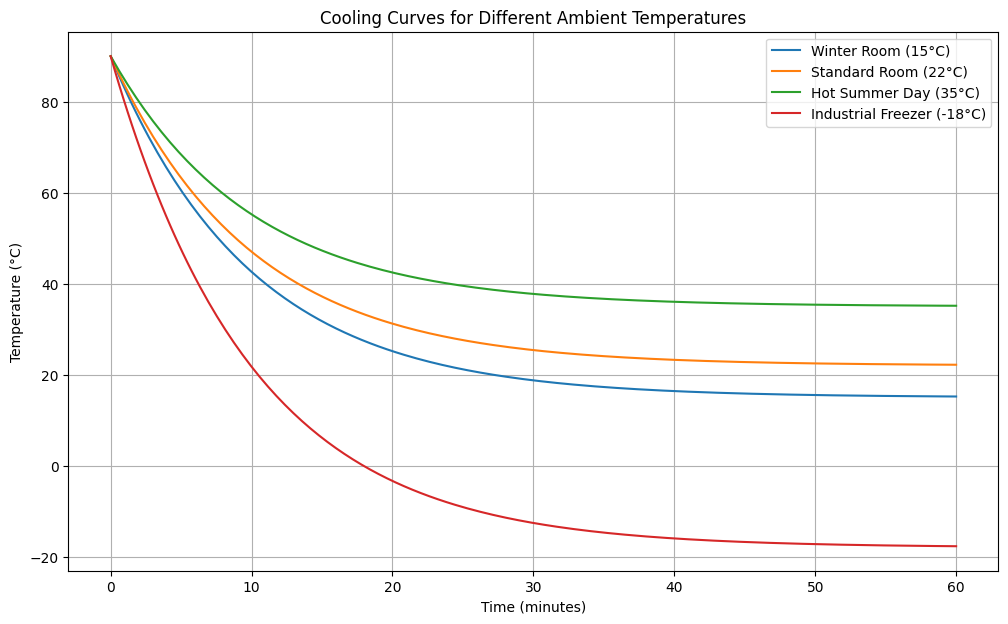

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def temp_over_time(t, T0, T_amb, k):
    """Calculate temperature at time t using Newton's Law of Cooling"""
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

# Parameters
k = 0.1  # cooling coefficient
T0 = 90  # initial temperature (°C)
t = np.linspace(0, 60, 200)  # time points (minutes)

# Different ambient temperatures to compare
ambient_temps = {
    "Winter Room": 15,
    "Standard Room": 22,
    "Hot Summer Day": 35,
    "Industrial Freezer": -18
}

# Create visualization
plt.figure(figsize=(12, 7))

for condition, T_amb in ambient_temps.items():
    temps = temp_over_time(t, T0, T_amb, k)
    plt.plot(t, temps, label=f"{condition} ({T_amb}°C)")

plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Cooling Curves for Different Ambient Temperatures')
plt.legend()

# Calculate cooling times for each condition
for condition, T_amb in ambient_temps.items():
    # Time to cool halfway to ambient
    half_temp = T_amb + (T0 - T_amb)/2
    time_to_half = -np.log(0.5)/k

    # Time to cool 90% of the way to ambient
    temp_90 = T_amb + 0.1*(T0 - T_amb)
    time_to_90 = -np.log(0.1)/k

    print(f"\n{condition} (T_amb = {T_amb}°C):")
    print(f"Time to cool halfway: {time_to_half:.1f} minutes")
    print(f"Time to cool 90%: {time_to_90:.1f} minutes")


Error analysis at 5 minutes:


TypeError: 'int' object is not subscriptable

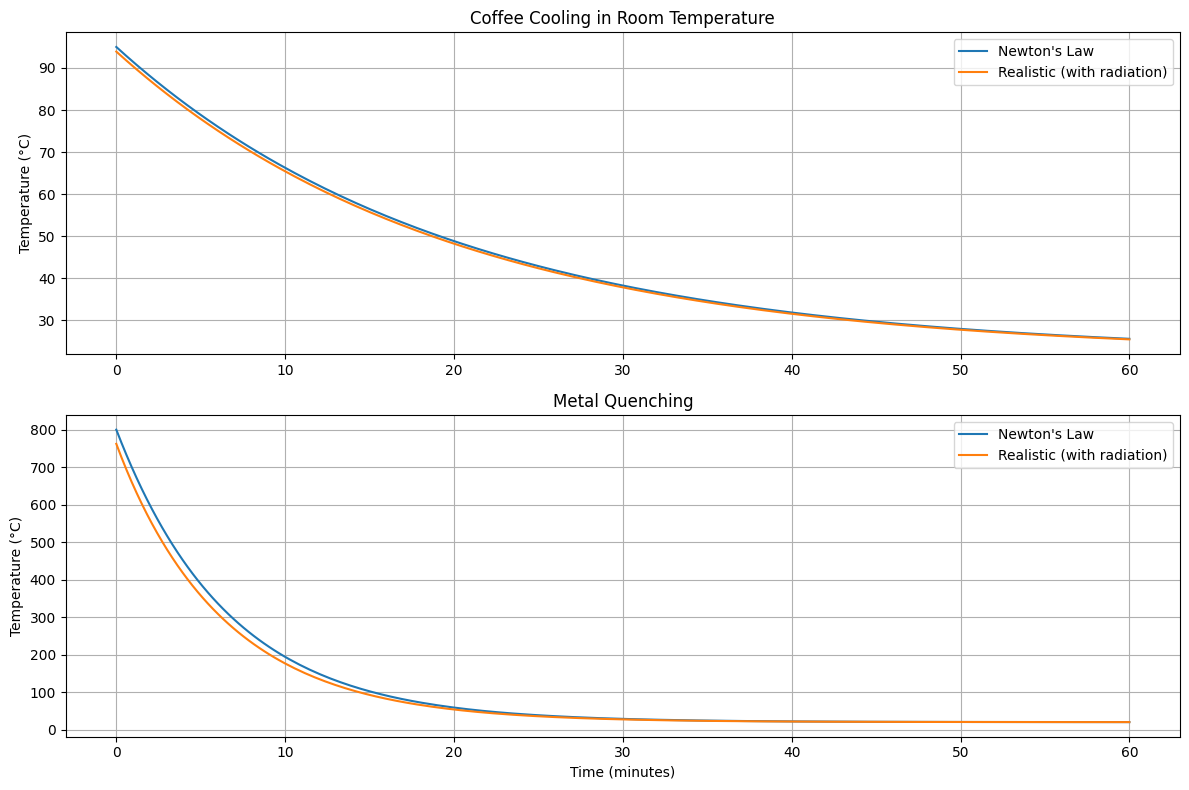

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def newton_cooling(T0, T_amb, k, t):
    """Basic Newton's Law of Cooling"""
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

def realistic_cooling(T0, T_amb, k, t, radiation_factor=2e-11):
    """More realistic cooling with radiation effects"""
    # Simplified Stefan-Boltzmann radiation term
    T = T0
    temps = []
    dt = t[1] - t[0]

    for _ in t:
        # Combine convection and radiation
        dT_convection = -k * (T - T_amb)
        dT_radiation = -radiation_factor * (T**4 - T_amb**4)
        T += (dT_convection + dT_radiation) * dt
        temps.append(T)

    return np.array(temps)

# Time settings
t = np.linspace(0, 60, 200)

# Example 1: Coffee cooling
coffee_params = {
    'T0': 95,     # Initial temperature (°C)
    'T_amb': 22,  # Room temperature
    'k': 0.05     # Cooling coefficient for coffee
}

# Example 2: Metal quenching
metal_params = {
    'T0': 800,    # Initial temperature (°C)
    'T_amb': 20,  # Room temperature
    'k': 0.15     # Cooling coefficient for metal in oil
}

# Plot comparisons
plt.figure(figsize=(12, 8))

# Coffee cooling
plt.subplot(2, 1, 1)
plt.plot(t, newton_cooling(coffee_params['T0'], coffee_params['T_amb'],
                          coffee_params['k'], t),
         label="Newton's Law")
plt.plot(t, realistic_cooling(coffee_params['T0'], coffee_params['T_amb'],
                            coffee_params['k'], t),
         label='Realistic (with radiation)')
plt.title('Coffee Cooling in Room Temperature')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Metal quenching
plt.subplot(2, 1, 2)
plt.plot(t, newton_cooling(metal_params['T0'], metal_params['T_amb'],
                          metal_params['k'], t),
         label="Newton's Law")
plt.plot(t, realistic_cooling(metal_params['T0'], metal_params['T_amb'],
                            metal_params['k'], t),
         label='Realistic (with radiation)')
plt.title('Metal Quenching')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Calculate percentage error at different temperatures
def calc_error(T0, T_amb, k, t_point):
    newton_temp = newton_cooling(T0, T_amb, k, t_point)
    realistic_temp = realistic_cooling(T0, T_amb, k, t_point)
    error = abs(newton_temp - realistic_temp) / realistic_temp * 100
    return error

# Print error analysis
test_times = [5, 15, 30]
for t_test in test_times:
    print(f"\nError analysis at {t_test} minutes:")
    print(f"Coffee cooling error: {calc_error(coffee_params['T0'], coffee_params['T_amb'], coffee_params['k'], t_test):.1f}%")
    print(f"Metal quenching error: {calc_error(metal_params['T0'], metal_params['T_amb'], metal_params['k'], t_test):.1f}%")